In [5]:
import yfinance as yf
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt

plt.rcParams["figure.figsize"] = [20, 6]

In [6]:
# # download stock values and compute returns

apl = yf.Ticker("AAPL")
apple = apl.history(start="2015-01-04", end="2021-09-01", interval="1d")

returns = apple["Close"] + apple["Dividends"]

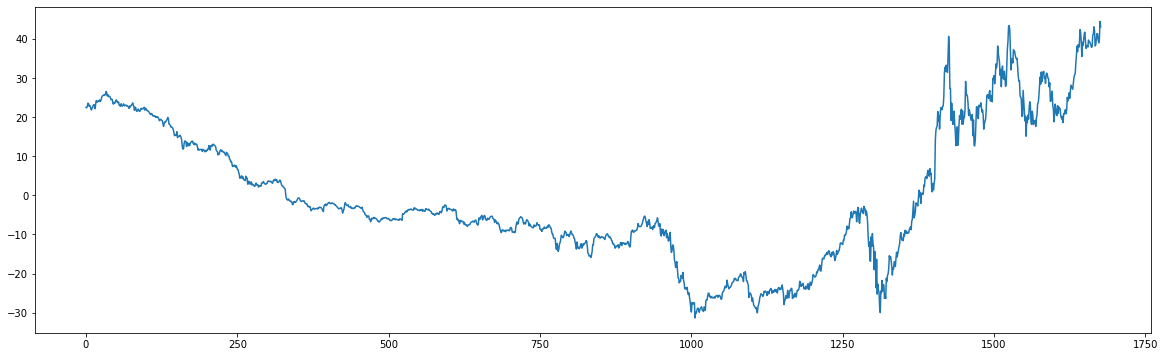

In [8]:
# let's try to extrapolate an eventual trend before differencing

from statsmodels.tsa.seasonal import seasonal_decompose

returns.dropna()

# Using scipy: Subtract the line of best fit
from scipy import signal
array_detrended = signal.detrend(returns.values)
plt.plot(array_detrended)

# make np.array into a pd.DataFrame
detrended = pd.DataFrame(array_detrended)

In [9]:
# now differentiate the detrended series

detrended_diff = detrended.diff()

det_diff=detrended_diff.dropna() # the first value would be a na

In [10]:
# ADF to control on detrended and differentiated series

from statsmodels.tsa.stattools import adfuller

X = det_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.846811
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [1]:
# once controlled for stationarity, check the ACF

Text(0.5, 1.0, 'Fig. 13: ACF plot')

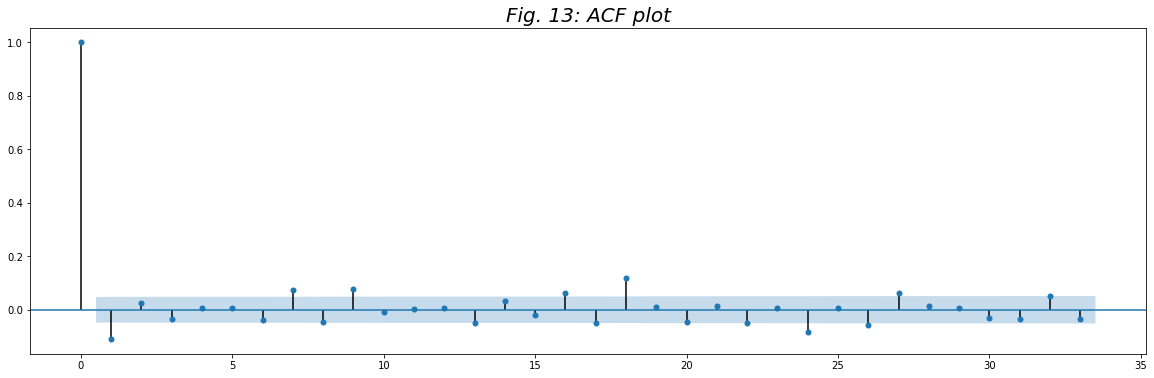

In [16]:
import statsmodels
from statsmodels.graphics import tsaplots

statsmodels.graphics.tsaplots.plot_acf(det_diff, alpha = 0.05)
plt.title("Fig. 13: ACF plot", fontsize=20, fontstyle = 'italic')

# ACF determines the value of MA model (q, here could be 1)

Text(0.5, 1.0, 'Fig. 14: PACF plot')

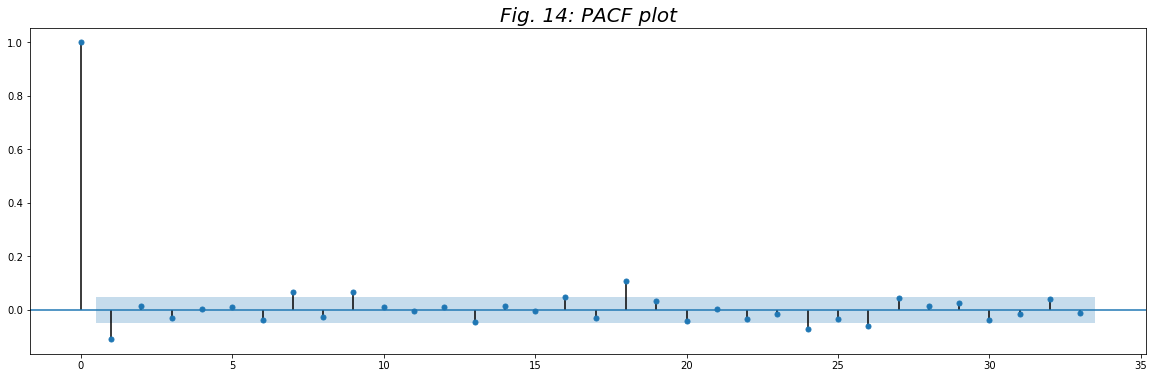

In [18]:
# PACF

statsmodels.graphics.tsaplots.plot_pacf(det_diff)
plt.title("Fig. 14: PACF plot", fontsize=20, fontstyle = 'italic')

# PACF determines the value of the AR function, = 1
# the ARIMA (1,1,1) should suit the best